# Introductory Statistics in Python - Session 2
The workshop addresses the fundamentals of statistics management with Python. The objective is to give the student the fundamental knowledge to perform main statistical tasks in Python. The Python codes will be written and executed in Jupyter Notebook. Students will be provided with the necessary databases to be able to run the codes.

In the second session, we will discuss the Central Limit Theorem and its practical applications.

### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

## **Table of Contents**

- <a href='#t4'>4. The Central Limit Theorem</a> 
     - <a href='#4.1.'>4.1. The CLT in action</a>
     - <a href='#4.2.'>4.2. The CLT in other summary statistics</a>
- <a href='#t5'>5. More distributions</a>
     - <a href='#5.1.'>5.1. Poisson</a>
     - <a href='#5.2.'>5.2. Exponential</a>
- <a href='#t6'>6. Descomponer una serie de tiempo</a>

In [1]:
>>> import math
>>> import statistics
>>> import numpy as np
>>> from scipy import stats
>>> import pandas as pd
>>> import matplotlib.pyplot as plt

#  <a id='t4'> 4. Central Limit Theorem</a>

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes the behavior of sample means (or other sample statistics) when drawing multiple samples from a population, regardless of the shape of the population's distribution. The theorem states that as the sample size increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the original population distribution.

## <a id='4.1.'> 4.1 The CLT in action </a>

Let's illustrate it with an example. In the first session, we created a DataFrame called die, and simulated its roll by calling the `sample` function

In [37]:
die  = {'number': [1, 2, 3, 4, 5, 6]}
die  = pd.DataFrame(die)

,number
0,5
1,4
2,1
3,3
4,2


In [53]:
# We can get the mean and std
print(f'The theoretical mean is: {np.mean(die)}')
print(f'The theoretical standard deviation is: {np.std(die)}')

The theoretical mean is: 3.5
The theoretical standard deviation is: number    1.707825
dtype: float64


In [56]:
# Roll 5 times
sample_5 = die.sample(5, replace=True).reset_index().drop(columns=['index'])

sample_5

,number
0,3
1,1
2,1
3,1
4,5


We can take the sample mean, which will we close the expected value

In [10]:
np.mean(sample_5)

4.2

If we roll it another five times we will get another mean, which also could be close to the expected value.

In [12]:
# Roll another 5 times and take the mean
sample_5 = die.sample(5, replace=True)
np.mean(sample_5)

3.6

We can repeat this 10 times, using a `for loop` and appending the mean of each 5 rolls sample

In [25]:
sample_means = []

for i in range(10):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

print(sample_means)

[2.0, 3.2, 2.4, 4.2, 3.6, 4.2, 4.2, 3.0, 4.6, 3.6]


We can plot these sample means. A summary statistic lie this is called sampling distribution.

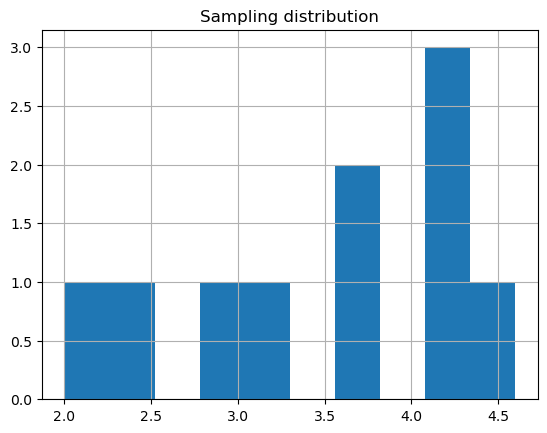

In [29]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

We can repeat the sampling 100 times and get a distribution that resembles a normal distribution

In [31]:
sample_means = []

for i in range(100):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

print(sample_means)

[2.8, 3.8, 3.4, 4.4, 2.6, 3.0, 3.6, 2.8, 3.6, 3.2, 4.0, 2.6, 3.2, 4.0, 2.8, 2.6, 2.6, 2.8, 4.4, 3.6, 4.0, 3.8, 3.2, 3.4, 3.2, 2.4, 1.8, 4.2, 3.0, 3.2, 3.0, 3.0, 3.2, 3.8, 2.4, 3.8, 4.8, 3.0, 3.4, 3.4, 2.0, 2.6, 3.4, 4.2, 3.0, 3.2, 3.4, 3.2, 3.2, 3.2, 3.2, 3.4, 2.6, 4.0, 4.0, 4.2, 2.4, 3.0, 3.2, 2.2, 3.2, 4.0, 3.2, 3.4, 2.8, 4.0, 4.2, 3.6, 3.4, 5.0, 4.0, 3.8, 3.4, 3.8, 4.0, 3.4, 4.2, 4.2, 2.8, 3.6, 3.6, 4.4, 3.0, 3.4, 4.6, 3.4, 2.8, 3.0, 2.6, 3.2, 3.8, 3.4, 3.2, 3.0, 3.2, 4.0, 3.0, 4.0, 4.0, 4.0]


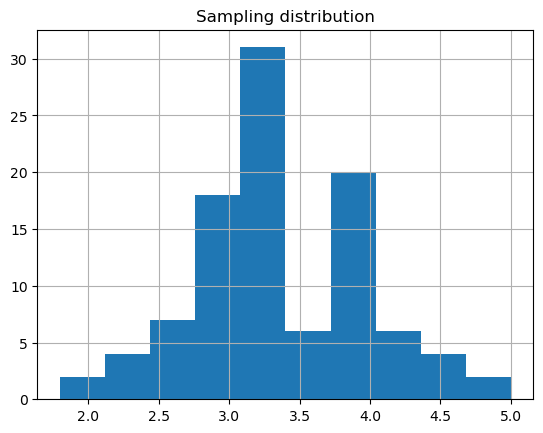

In [32]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

In [34]:
sample_means = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))  

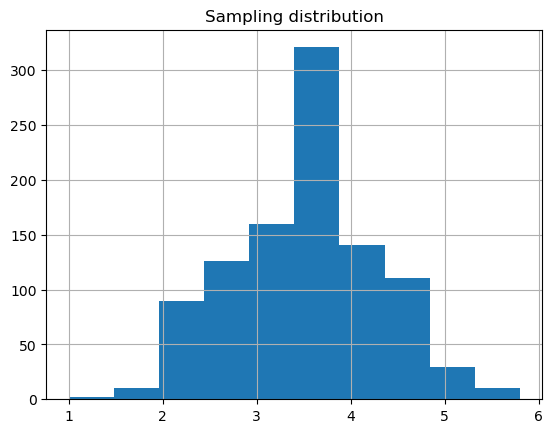

In [35]:
sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

If we do it 1000 times the ressemblance is even bigger. **This is the CLT in action!** Even though the original distribution of the die was uniform, the sampling distribution becomes closer and closer to a normal distribution as the number of trials increases. Let's finally do 10000 trials!

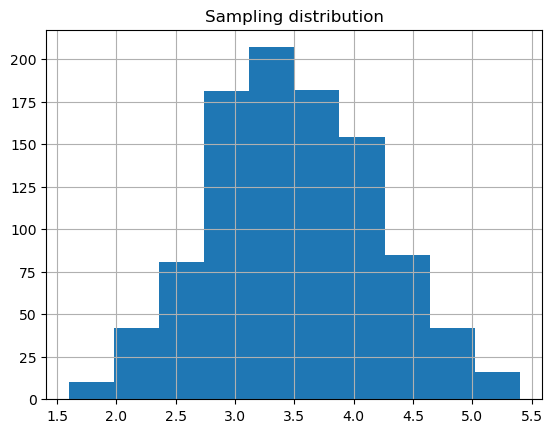

In [40]:
sample_means = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))

sample_means = pd.DataFrame(sample_means)
sample_means.hist()
plt.title('Sampling distribution')
plt.show()

The Central Limit Theorem (CLT) is applicable in situations where data is collected through **random sampling**, ensuring that each observation is **independent** of the others. For the CLT to hold, the sample size should ideally be sufficiently large, with a common guideline suggesting a minimum of **30 observations**.

## <a id='4.2.'> 3.2 The CLT in other summary statistics </a>
The CLT can be applied to other summary statistics as well, like the standard deviation, the median and proportions. 

C:\Users\estca\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


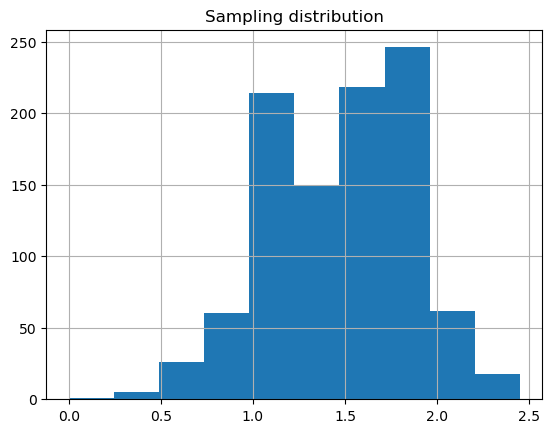

In [68]:
sample_std = []

for i in range(1000):
    sample_5 = die.sample(5, replace=True)
    sample_std.append(np.std(sample_5))

sample_std = pd.DataFrame(sample_std)
sample_std.hist()
plt.title('Sampling distribution')
plt.show()

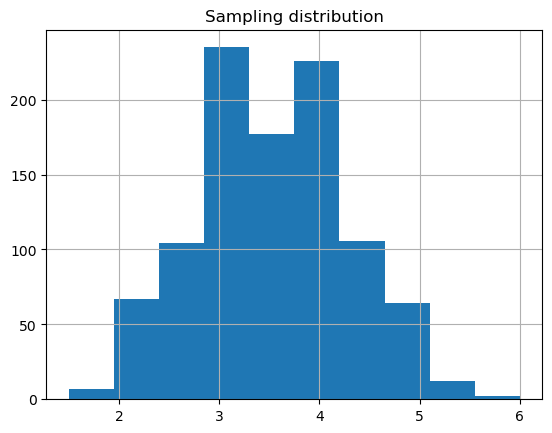

In [69]:
sample_median = []

for i in range(1000):
    sample_10 = die.sample(10, replace=True)
    sample_median.append(np.median(sample_10))

sample_median = pd.DataFrame(sample_median)
sample_median.hist()
plt.title('Sampling distribution')
plt.show()

We can get the mean of the `sample_means`, `sample_median` and `sample_std` and we will get a value pretty close to the expected mean, expected median and expected standard deviation

In [43]:
np.mean(sample_means)

3.496

In [44]:
np.mean(sample_std)

1.4603354335113332

In [70]:
np.mean(sample_median)

3.508

We can now try it action with the deals database from the first session. We fill focus on the `num_user` column, which does not have a normal distribution

In [71]:
>>> deals = pd.read_csv('databases/deals.csv')
>>> deals.drop(columns=['Unnamed: 0'], inplace=True)
>>> deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [76]:
np.random.seed(42)

sample_means = []

# We loop 1000 times
for i in range(1000):
  # We take a sample of 25 num_users
  sample_25 = deals['num_users'].sample(25, replace=True)
  # We calculate mean of sample_25
  sample_25_mean = np.mean(sample_25)
  # We append sample_25_mean to sample_means
  sample_means.append(sample_25_mean)

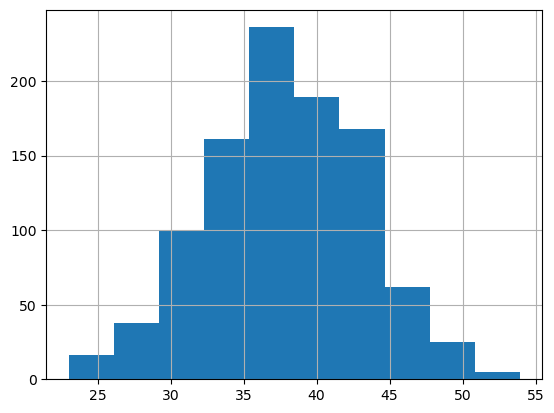

In [77]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

#  <a id='t5'> 5. More distributions</a>

## <a id='5.1.'> 5.1 Poisson </a>

The Poisson Distribution models the probability of a certain number of events occurring within a fixed interval. It is characterized by a single parameter, $\lambda$ (lambda), representing the average rate of event occurrences. This distribution is particularly suitable for rare events, assuming independence between events and a constant average rate. The probability mass function provides the likelihood of observing a specific number of events in the given interval. With an expected value and variance both equal to $\lambda$, the Poisson Distribution is a concise and effective tool for modeling scenarios with low-probability events and a consistent average rate.

Some examples of Poisson distributions is the number of car accidents in a road in a given time frame, as it varies throughout the day and each day of the week. Other examples are the quantity of incoming calls during specific periods in a call centers or the number of pets adopted each week at an animal shelter.

[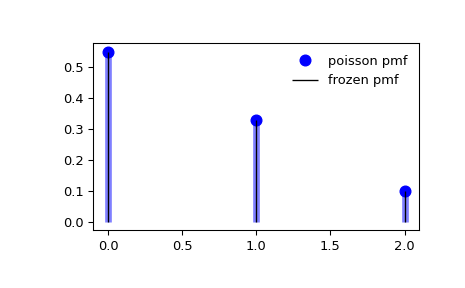](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)


In [78]:
>>> from scipy.stats import poisson

For different lambda values, the poisson pmf will take different forms, with its peak at the lambda values

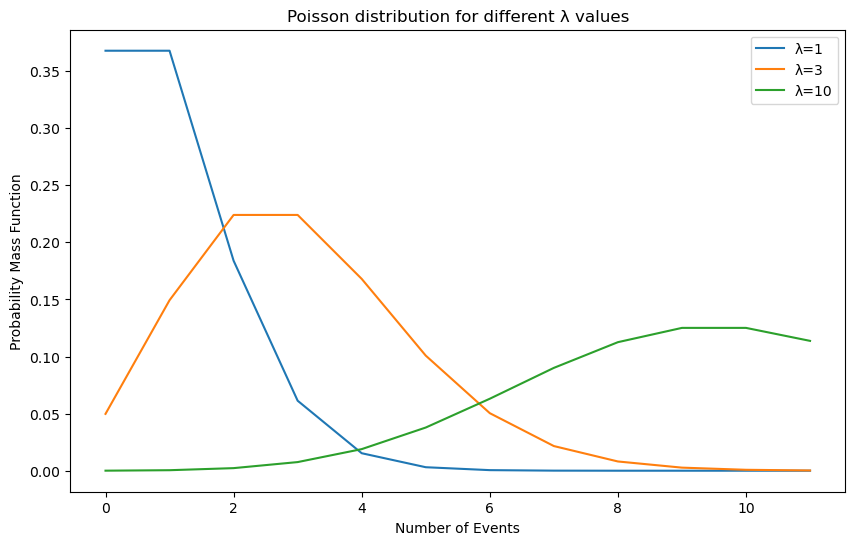

In [105]:
lambda_values = [1, 3, 10]

plt.figure(figsize=(10, 6))

# We plot the Poisson distributions for different lambdas
for lmbda in lambda_values:
    x = range(0, 12)
    plt.plot(x, poisson.pmf(x, lmbda), label=f'λ={lmbda}')

plt.title('Poisson distribution for different λ values')
plt.xlabel('Number of Events')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.show()

Let's say that the usual number of car accidents in an hour on a busy road is 3. 

What is the probability of it being 5?

In [89]:
poisson.pmf(5, 3)

0.10081881344492458

What about the probability of 5 or fewer accidents?

In [91]:
poisson.cdf(5, 3)

0.9160820579686966

And the probability of more than 5 accidents?

In [92]:
1 - poisson.cdf(5, 3)

0.08391794203130343

Let's simulate the number of accidents the following 30 hours given than the average number of accidents is 3

In [96]:
accidents = poisson.rvs(3, size = 30)
accidents

array([6, 2, 1, 7, 3, 3, 5, 2, 2, 1, 3, 2, 8, 0, 5, 1, 4, 2, 4, 4, 3, 2,
       1, 2, 1, 2, 1, 1, 3, 1], dtype=int64)

Finally, we can apply the CLT to a poisson distribution

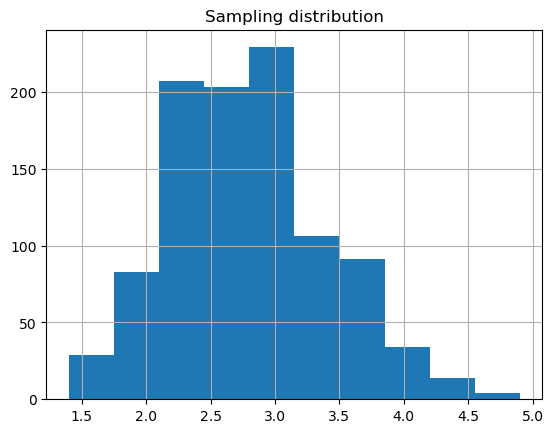

In [98]:
sample_mean = []

accidents = pd.Series(accidents)

for i in range(1000):
    sample_5 = accidents.sample(10, replace=True)
    sample_mean.append(np.mean(sample_5))

sample_mean = pd.DataFrame(sample_mean)
sample_mean.hist()
plt.title('Sampling distribution')
plt.show()

## <a id='5.2.'> 5.2 Exponential </a>

The Exponential Distribution models the time between independent and identically distributed events occurring at a constant average rate. It is characterized by a single parameter, $\lambda$ (lambda), representing the rate of event occurrences. This distribution is commonly used to describe the waiting time until the next event in a sequence which follows a Poisson distribution. The probability density function provides the likelihood of waiting a specific amount of time before the next event. It has an expected value (mean) equal to 1/$\lambda$ and a standard deviation equal to 1/$\lambda$. Unlike the Poisson distribution, it is continuous as it represents time.

Some examples of Exponential distributions is the probability of less than thirty minutes between one car accident and the other, the probability of one hour between two phone calls at a call centers or the probability of less than two days between two adoptions at an animal shelter.

In [99]:
>>> from scipy.stats import expon

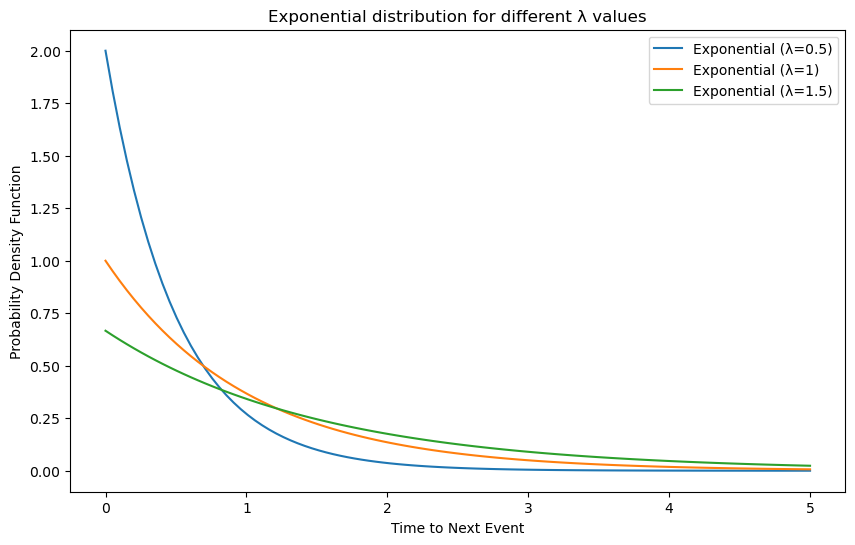

In [107]:
lambda_values = [0.5, 1, 1.5]

plt.figure(figsize=(10, 6))

# Plotting the Exponential distributions for different lambdas
for lmbda in lambda_values:
    x = np.linspace(0, 5, 100)
    plt.plot(x, expon.pdf(x, scale=lmbda), label=f'Exponential (λ={lmbda})')

plt.title('Exponential distribution for different λ values')
plt.xlabel('Time to Next Event')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

If we have an exponential distribution, with $\lambda = 0.5$, that means that the expected time between two accidents is half an hour.